In [2]:
# -*- coding: utf-8 -*-
import openmc
import os
import json
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
import sys
from PIL import Image
import numpy as np
import pandas as pd

In [10]:
from pathlib import Path
import sys 
CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[2]
sys.path.append(str(project_root))
from src.utils.common.isotope import Radionuclide_lara

In [16]:
df = pd.read_csv("rn.csv", sep=";")
# modify the format of the Radionuclide name : change 54Mn to Mn-54 for example
df["Radionuclide"] = df["Radionuclide"].apply(lambda x: f"{''.join(filter(str.isalpha, x))}-{''.join(filter(str.isdigit, x))}")

In [17]:
dict_rn = df.set_index("Radionuclide").to_dict()["Mass[g]"]


In [18]:
dict_rn

{'Mn-54': 0.0002,
 'Co-58': 0.0003,
 'Co-60': 0.0005,
 'Fe-59': 0.0001,
 'Cr-51': 0.0004,
 'Co-57': 0.0002,
 'Zn-65': 0.0001,
 'Fe-55': 0.0002}

In [37]:
rays = []
weights = []
for rn in dict_rn.keys():
    rn_lara = Radionuclide_lara(rn)
    energy, intensity, types = rn_lara.get_rays_emission_data(photon_only=True)
    print(len(energy))
    rays.extend(energy)
    weights.extend(intensity)
    print(len(weights))

5
5
7
12
10
22
11
33
5
38
14
52
7
59
5
64


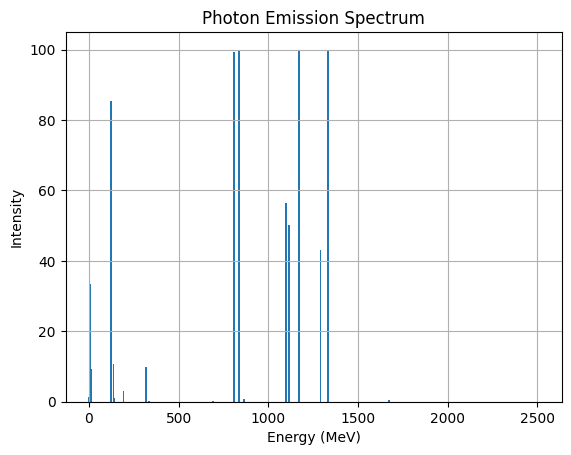

In [36]:
plt.bar(rays, weights, width=10)
plt.xlabel("Energy (MeV)")
plt.ylabel("Intensity")
plt.title("Photon Emission Spectrum")
plt.grid(True)
plt.show()

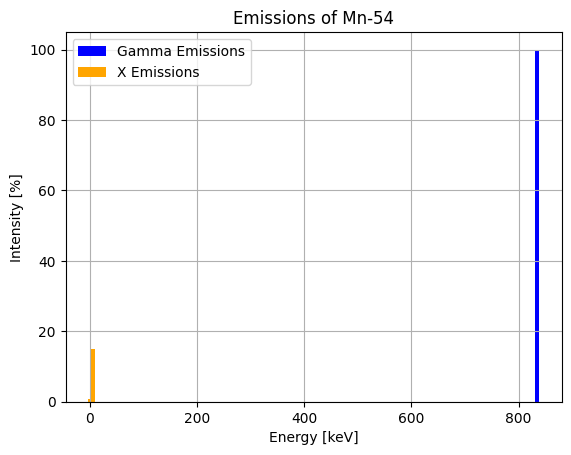

Activity for 10g of Mn-54: 57316600000.0 Bq


In [23]:
rn_lara = Radionuclide_lara("Mn-54")
energy, intensity, types = rn_lara.get_rays_emission_data(photon_only=False)
rn_lara.plot_emissions(saving_figure=False, photon_only=False, log_scale=False)
print(f"Activity for 10g of Mn-54: {rn_lara.get_activity(mass=dict_rn['Mn-54'])} Bq")